In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup 

In [4]:
url = 'https://socialblade.com/youtube/'

In [10]:
html = requests.get(url)
print (html.text[:500])
soup = BeautifulSoup(html.text)


<!DOCTYPE html>
<head>
<title>Track YouTube analytics, future predictions, & live subscriber counts - Social Blade</title>
<meta name="description" content="View the daily YouTube analytics, track progress charts, view future predictions, related channels, and track realtime live sub counts.">
<meta name="keywords" content="YouTube statistics, YouTube analytics, daily statistics, daily graphs, YouTube users, top youtubers, top YouTube users, top YouTube networks, top charts, YouTube networks, ap


In [13]:
soup

<!DOCTYPE html>
<html><head>
<title>Track YouTube analytics, future predictions, &amp; live subscriber counts - Social Blade</title>
<meta content="View the daily YouTube analytics, track progress charts, view future predictions, related channels, and track realtime live sub counts." name="description"/>
<meta content="YouTube statistics, YouTube analytics, daily statistics, daily graphs, YouTube users, top youtubers, top YouTube users, top YouTube networks, top charts, YouTube networks, apply for YouTube partnership, YouTube consulting" name="keywords"/>
<meta charset="utf-8"/>
<meta content="website" property="og:type"/>
<meta content="View the daily YouTube analytics, track progress charts, view future predictions, related channels, and track realtime live sub counts." property="og:description"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="socialblade" name="twitter:site"/>
<meta content="View the daily YouTube analytics, track progress charts, view futu

In [14]:
body = soup.findAll("div", {"class", "table-body"})

In [28]:
lst = [i.text for i in body[0] if i != u'\n']
print(lst)

for i in body[0]:
    if i != '\n':
        print(i)
    

['1', 'A++', 'T-Series', '13,288', '95,264,425', '68,191,994,118']
<div class="table-cell section-rank">1</div>
<div class="table-cell section-grade"><span style="font-weight: bold; color:#00bee7;">A++</span></div>
<div class="table-cell section-mg"><a href="/youtube/user/TSeries">T-Series</a></div>
<div class="table-cell section-lg">13,288</div>
<div class="table-cell section-lg">95,264,425</div>
<div class="table-cell section-lg">68,191,994,118</div>


In [29]:
def make_dataframe_row(row):
    lst = [i.text for i in row if i != '\n']
    return dict(rank = int(lst[0]),
               grade = str(lst[1]),
               channel = str(lst[2]),
               videos = int(lst[3].replace(",", "")),
               subs = int(lst[4].replace(",", "")),
               views = int(lst[5].replace(",", "")))

In [30]:
print (make_dataframe_row(body[0]))

{'rank': 1, 'grade': 'A++', 'channel': 'T-Series', 'videos': 13288, 'subs': 95264425, 'views': 68191994118}


In [31]:
data = []
for tr in body:
    d = make_dataframe_row(tr)
    for a in tr.find_all('a', href = True):
        d['link'] = a['href']
    data.append(d)

In [34]:
df = pd.DataFrame(data)

In [35]:
df

,channel,grade,link,rank,subs,videos,views
0,T-Series,A++,/youtube/user/TSeries,1,95264425,13288,68191994118
1,PewDiePie,A,/youtube/user/pewdiepie,2,94659942,3811,21225196044
2,5-Minute Crafts,A+,/youtube/user/295-Dw_tDNtZXFeAPAW6Aw,3,54146861,2998,13368760482
3,Canal KondZilla,A+,/youtube/user/CanalKondZilla,4,48703281,1018,24221675556
4,SET India,A++,/youtube/user/Setindia,5,46350573,30376,32230496194
5,Cocomelon - Nursery Rhymes,A++,/youtube/user/checkgate,6,44944763,417,26128561944
6,Justin Bieber,B,/youtube/user/kidrauhl,7,44398410,132,605914641
7,WWE,A+,/youtube/user/wwefannation,8,42361296,40872,31580048597
8,Dude Perfect,A,/youtube/user/corycotton,9,41382391,202,7713798304
9,HolaSoyGerman.,B+,/youtube/user/Holasoygerman,10,38922063,137,3875125781


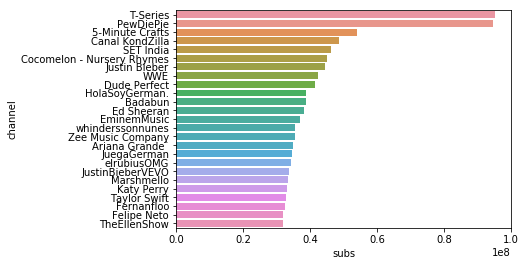

In [39]:
import seaborn as sns
ax = sns.barplot(x= df["subs"],y = df["channel"])

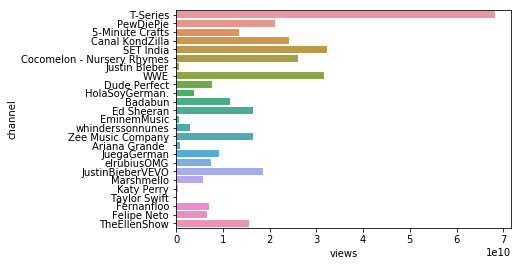

In [42]:
ax = sns.barplot(x= df["views"],y = df["channel"])

ModuleNotFoundError: No module named 'wikipedia'

In [45]:
!pip install wikipedia

  Running setup.py bdist_wheel for wikipedia: started
  Running setup.py bdist_wheel for wikipedia: finished with status 'done'
  Stored in directory: C:\Users\marya\AppData\Local\pip\Cache\wheels\87\2a\18\4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [48]:
import wikipedia
print(wikipedia.summary("T-series", sentences = 5))

Super Cassettes Industries Private Limited, doing business as T-Series, is a music record label and film production company in India founded by Gulshan Kumar in 1983. It is primarily known for Bollywood music soundtracks and Indi-pop music. As of 2014, T-Series is India's largest music record label, with up to a 35% share of the Indian music market, followed by Sony Music India and Zee Music. T-Series also owns and operates the most-viewed and most-subscribed channel on YouTube, with over 94 million subscribers.
Kumar, initially a fruit juice seller in Delhi, founded T-Series to sell pirated Bollywood songs before the company eventually began producing new music.


In [32]:
df

NameError: name 'df' is not defined